In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DoctorVisits-DA.csv')

In [4]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [7]:
df1 = df.drop_duplicates()


In [8]:
df1.shape

(5190, 13)

In [9]:
df.shape

(5190, 13)

In [10]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


<Axes: ylabel='age'>

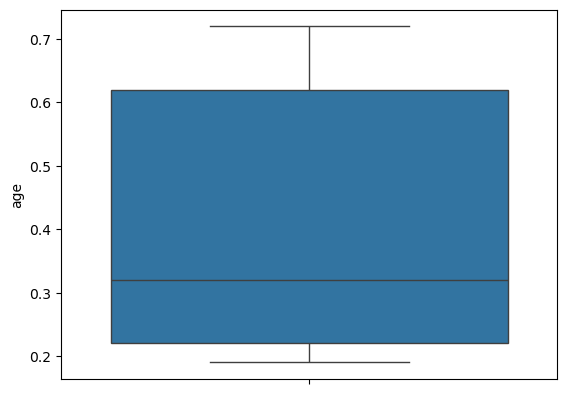

In [11]:
sns.boxplot(y='age', data=df)

<Axes: ylabel='count'>

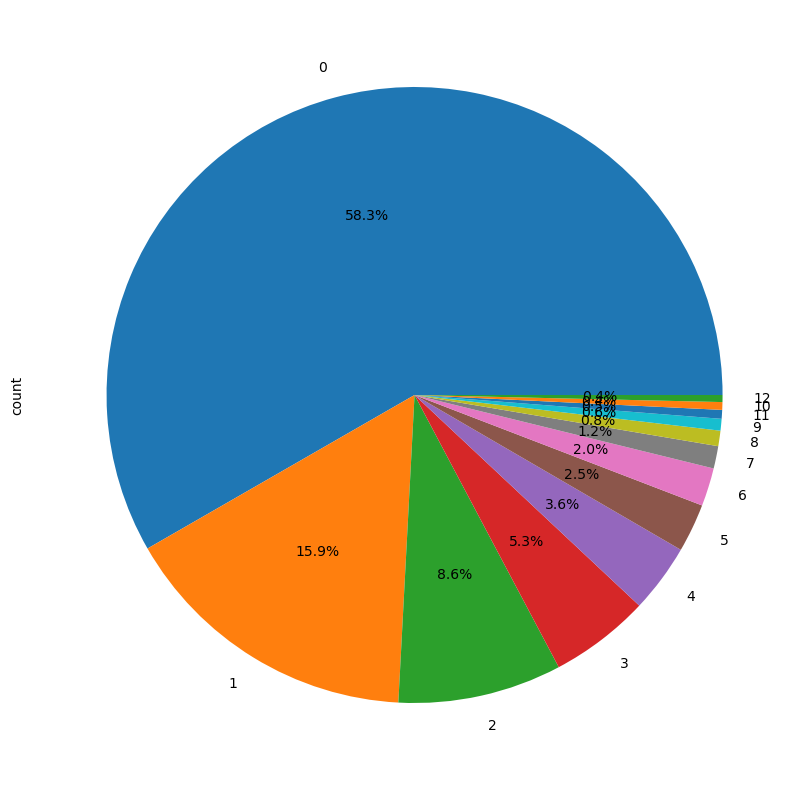

In [12]:
plt.figure(figsize=(10,10))
df['health'].value_counts().plot(kind='pie',autopct="%1.1f%%")

<Axes: xlabel='age'>

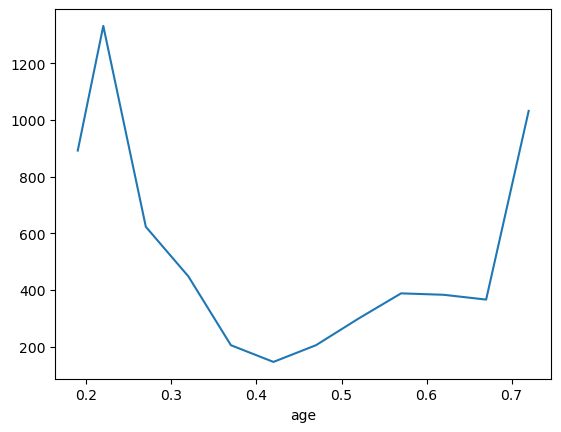

In [13]:
df1.groupby(['age'])['health'].sum().plot(kind='line')

In [14]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

## male and females :

In [16]:
df['gender'].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

## min, max, medium income

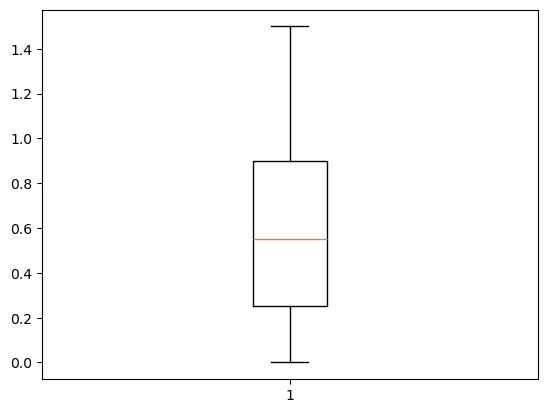

In [18]:
y = list(df.income)
plt.boxplot(y)
plt.show()

## num of days of reduced of male and female seperarly due to illness :

In [20]:
df.groupby('gender')['reduced'].mean()

gender
female    0.975574
male      0.738344
Name: reduced, dtype: float64

## null values:

<Axes: >

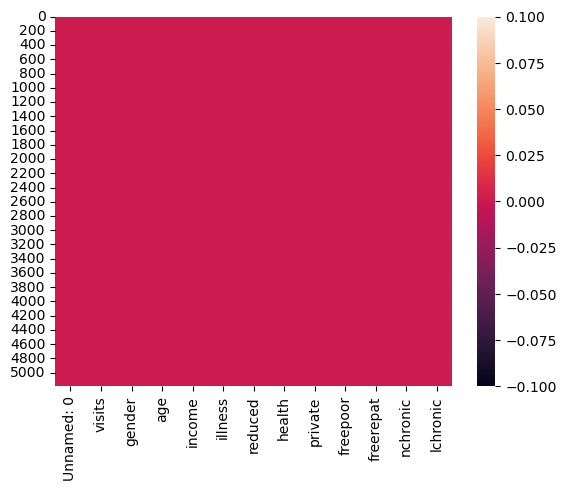

In [22]:
sns.heatmap(df.isnull())

In [46]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [52]:
illness_counts = df['illness'].value_counts().sort_index()

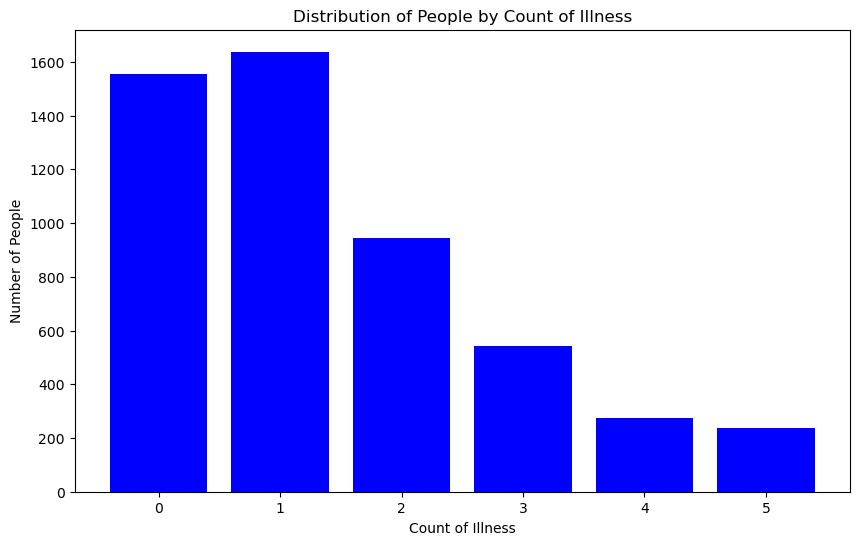

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(illness_counts.index, illness_counts.values, color='blue')
plt.xlabel('Count of Illness')
plt.ylabel('Number of People')
plt.title('Distribution of People by Count of Illness')
plt.xticks(illness_counts.index)
plt.show()

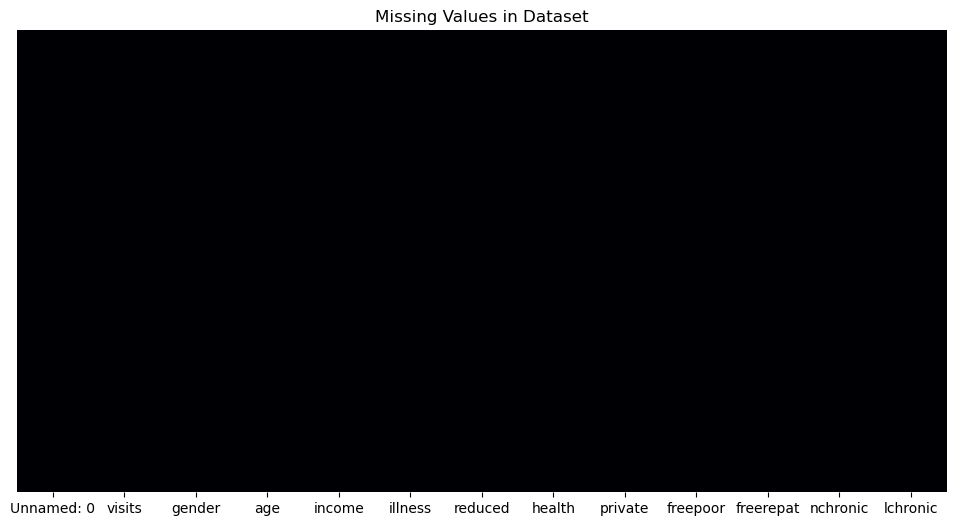

In [68]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing Values in Dataset')
plt.show()

In [72]:
income_visits_corr = df['income'].corr(df['visits'])
print(f"Correlation between income and hospital visits: {income_visits_corr}")

Correlation between income and hospital visits: -0.07683982934758844


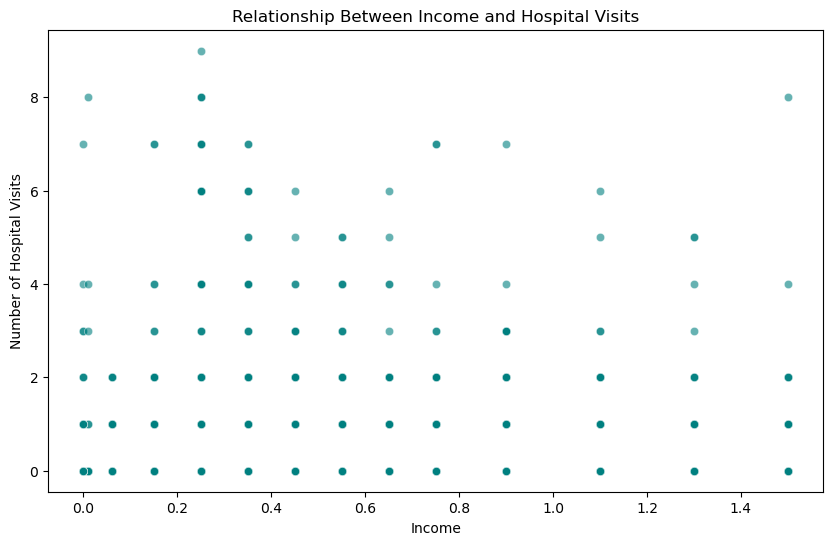

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='visits', data=df, alpha=0.6, color='teal')
plt.xlabel('Income')
plt.ylabel('Number of Hospital Visits')
plt.title('Relationship Between Income and Hospital Visits')
plt.show()

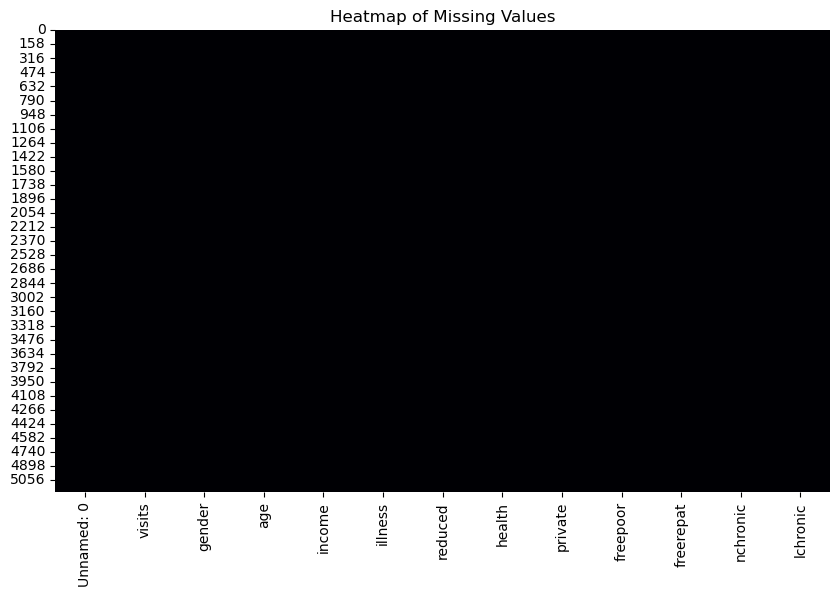

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Missing Values')
plt.show()